# Classification of fortis, scandens, fuliginosa and their hybrids based on the morphological measures

* Data source: Introgressive hybridization and natural selection in Darwin's finches. Grant PR, Grant BR.  
https://datadryad.org/resource/doi:10.5061/dryad.vc348  
* Data Published:  November 11, 2015  
* Data shape: 2104 examples and 15 features
* Aim: Find the species/breed limits for fortis, scandens, fuliginosa and their hybrids

In [1]:
### Basic modules
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import the data

In [2]:
# read the data
data0 = pd.read_csv("Dataset/fortis_scandens.txt", header = 0, sep = "\t")
data0.head()

,band,Species,sex,Time period,year,Early v Late,weight,wing,tarsus,bill length,bill depth,bill width,PC1 body,PC1 beak,PC2 beak
0,2639,fortis,male,1,1981,Early,15.84,67.13,19.55,10.30,8.95,8.32,-0.276196,-0.562615,-0.559996
1,2743,fortis,male,1,1981,Early,19.25,72.38,19.38,12.10,10.85,10.13,1.360188,3.103452,-1.217390
2,3527,fortis,male,1,1981,Early,17.27,71.12,19.60,11.79,10.33,9.59,0.792701,2.110300,-0.915424
3,4190,fortis,female,1,1981,Early,15.78,66.62,19.10,11.04,9.93,8.94,-0.613596,0.976308,-0.849961
4,4378,fortis,male,1,1981,Early,17.62,68.78,19.10,10.64,9.66,8.76,0.196324,0.487143,-0.873340


In [3]:
# Have an overview of the data
data0.describe()

,band,Time period,year,weight,wing,tarsus,bill length,bill depth,bill width,PC1 body,PC1 beak,PC2 beak
count,2105.000000,2105.000000,2105.000000,2105.000000,2103.000000,2105.000000,2105.000000,2104.000000,2105.000000,2103.000000,2104.000000,2104.000000
mean,17694.665558,3.857007,1999.158195,16.605230,67.986396,19.439732,11.515373,8.955010,8.533454,-0.004500,-0.006253,0.001259
std,3166.473254,1.754131,8.976583,2.535702,3.196140,1.102704,1.609500,0.812021,0.645526,1.579038,1.466034,0.808244
min,1444.000000,1.000000,1981.000000,8.300000,55.000000,15.500000,7.800000,6.000000,5.900000,-5.756511,-5.684106,-1.862806
25%,16143.000000,2.000000,1992.000000,14.800000,66.000000,18.700000,10.300000,8.500000,8.100000,-1.065584,-0.875650,-0.592867
50%,19017.000000,4.000000,2001.000000,16.400000,68.000000,19.300000,11.100000,9.000000,8.600000,-0.180165,0.076987,-0.258863
75%,19605.000000,6.000000,2009.000000,18.300000,70.000000,20.100000,12.810000,9.500000,8.900000,0.968344,0.951339,0.612926
max,22000.000000,6.000000,2012.000000,24.700000,80.000000,23.200000,16.000000,13.100000,11.400000,5.123422,6.462476,2.312322


In [4]:
# Number of empty values
data0.isna().sum()

band            0
Species         0
sex             0
Time period     0
year            0
Early v Late    0
weight          0
wing            2
tarsus          0
bill length     0
bill depth      1
bill width      0
PC1 body        2
PC1 beak        1
PC2 beak        1
dtype: int64

Apparently, very few rows have missing values which means we would not lose much data if we drop these examples. Band is only the identifier which is not useful, so we can also remove that column.

In [5]:
# Clean data
data1 = data0.copy()
data1 = data1.dropna().drop("band", axis = 1)

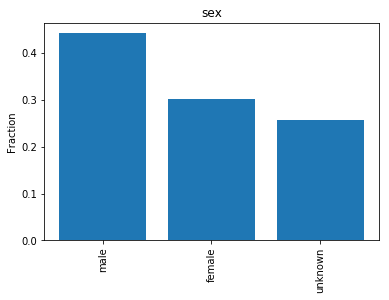

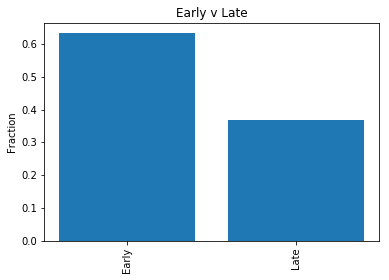

In [6]:
# Check for categorical columns
cat_features = ["sex", "Early v Late"]

def check_cat_features(data1, cat_features):
    for f in cat_features:
        counts = pd.DataFrame(data1[f].value_counts())
        counts["Fraction"] = counts[f]/counts[f].sum()
        plt.bar(counts.index, counts["Fraction"])
        plt.title(f)
        plt.ylabel("Fraction")
        plt.xticks(rotation = 90)
        plt.show()

check_cat_features(data1, cat_features)

Since Early v Late and Time period are another representations of year, we choose to use only year.  
Because the last three PC columns are reduced dimensions of weight, wing, and bill features, it may lose part of the variance. Therefore, we use the "direct" features.

In [7]:
data1 = data1.drop(["Early v Late", "Time period", "PC1 body", "PC1 beak", "PC2 beak"], axis = 1)

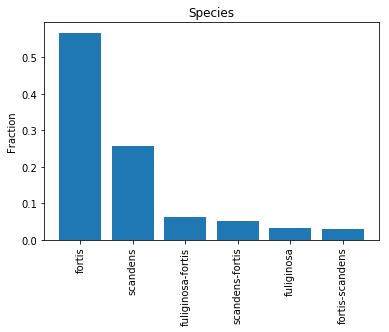

In [8]:
# Check the representation of the labels
label = ["Species"]
check_cat_features(data1, label)

As far as we can tell, about 25% of the examples have unknown sex. It will introduce bias if we use typical ways of imputation because sex is theoretically associated with other phenotypes. So the best way here is to keep unknow as an independent category.  

Another feature in this data is that we have stratified classes. This means it is necessary to draw proportionally samples from each class in training and test sets.

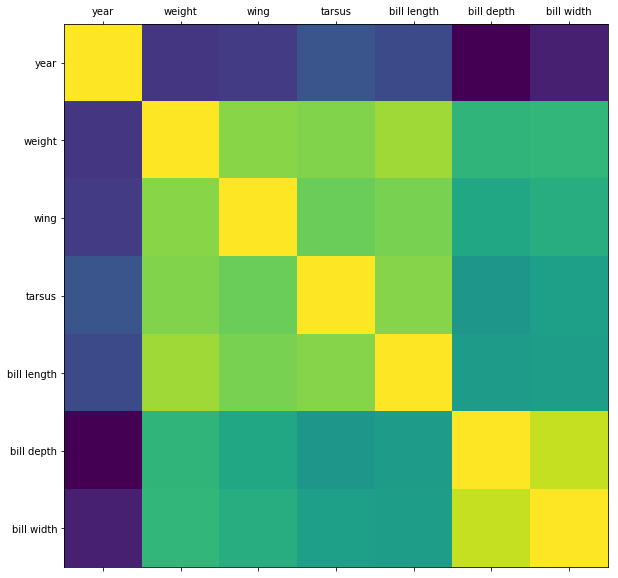

                 year    weight      wing    tarsus  bill length  bill depth  \
year         1.000000 -0.033259 -0.012595  0.096991     0.045568   -0.229013   
weight      -0.033259  1.000000  0.782200  0.767441     0.822670    0.574620   
wing        -0.012595  0.782200  1.000000  0.721948     0.750482    0.501441   
tarsus       0.096991  0.767441  0.721948  1.000000     0.779088    0.422288   
bill length  0.045568  0.822670  0.750482  0.779088     1.000000    0.452433   
bill depth  -0.229013  0.574620  0.501441  0.422288     0.452433    1.000000   
bill width  -0.120717  0.585803  0.535061  0.463575     0.461495    0.892048   

             bill width  
year          -0.120717  
weight         0.585803  
wing           0.535061  
tarsus         0.463575  
bill length    0.461495  
bill depth     0.892048  
bill width     1.000000  


In [9]:
# Further explore the feature correlations
feature_corr = data1.corr()
def corr_fig(feature_corr):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(feature_corr)
    ax.set_xticklabels([''] + ['year', 'weight', 'wing', 'tarsus', 'bill length',
       'bill depth', 'bill width'])
    ax.set_yticklabels([''] + ['year', 'weight', 'wing', 'tarsus', 'bill length',
       'bill depth', 'bill width'])
    plt.show()
corr_fig(feature_corr)
print(feature_corr)

Feature correlation shows bill depth and bill width are highly correlated.  
Weight is in general well correlated with other morphological measurements, especially bill length.

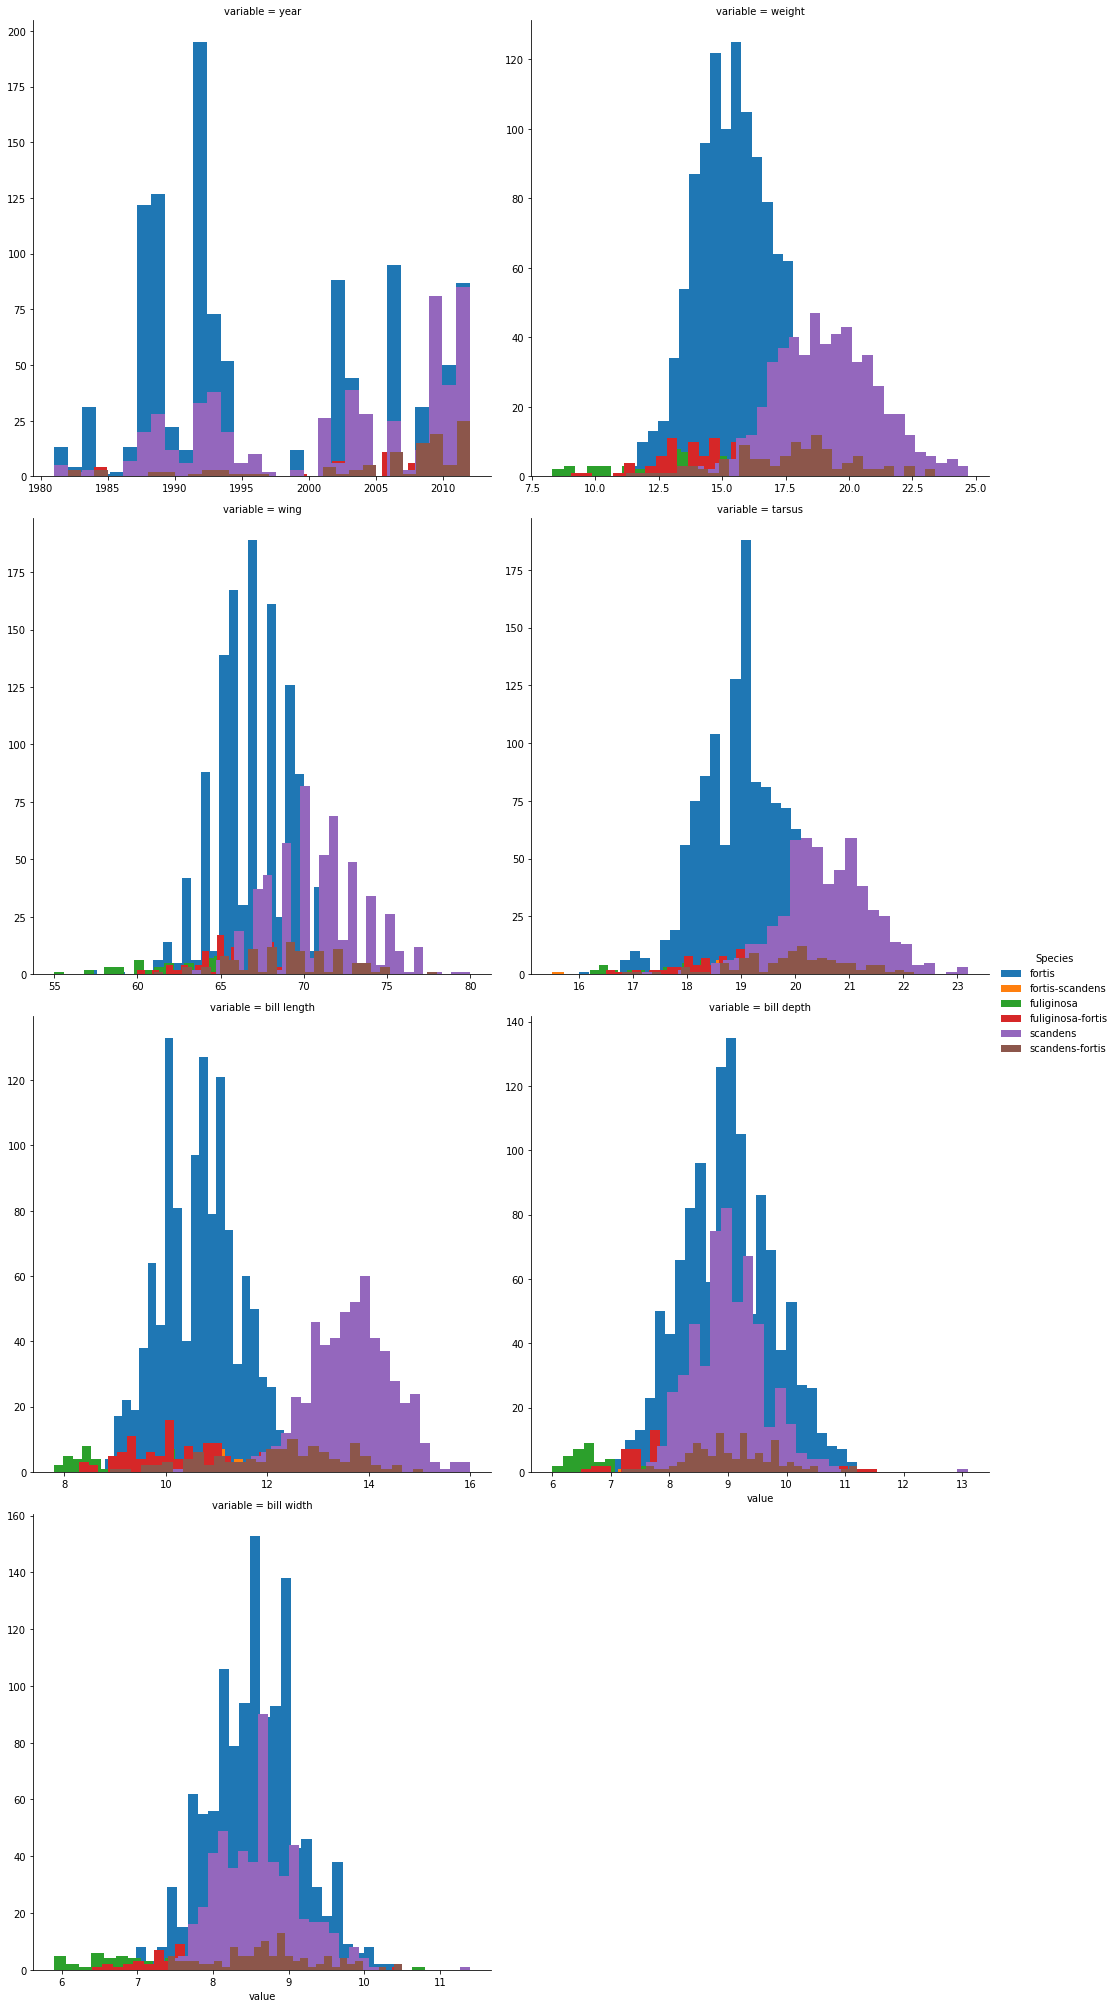

In [10]:
# Investigate the distribution of numeric features in each class
data1_num = data1.drop("sex", axis = 1)
def num_feature_hist(data1_num):
    num_features = list(data1_num)
    num_features = num_features.remove("Species")
    
    import seaborn as sns
    data_melt = pd.melt(data1_num, id_vars="Species", value_vars=num_features)
    g = sns.FacetGrid(data_melt, 
                      col = "variable", 
                      hue = "Species", 
                      col_wrap=2, 
                      sharex=False,
                      sharey = False,
                      height = 7)
    g.map(plt.hist, "value", bins = 30).add_legend()

    plt.show()
num_feature_hist(data1_num)        

We should also remove year because that is not a determinant of which species a sample is expected to be.

In [11]:
data1 = data1.drop("year", axis=1)

In [12]:
# finish up cleaning the data and have a look at the data shape
data1.shape

(2102, 8)

## Data preparation

In [13]:
# Always shuffle the data first
shuffled_index = np.random.permutation(data1.index)
data_shuffled = data1.reindex(shuffled_index)

# Separate X and y
X = data_shuffled.drop("Species", axis = 1)
y = data_shuffled["Species"]

# Split the data to traning and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)
print("training data is {} and test data is {}".format(y_train.shape[0], y_test.shape[0]))

training data is 1471 and test data is 631


In [14]:
# Standardize numberic features and OneHotCode for categorical feature
num_features = list(X_train)
num_features.remove("sex")
cat_feature = ["sex"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

pipeline = ColumnTransformer(transformers=[
    ("num", Normalizer(), num_features),
    ("cat", OneHotEncoder(), cat_feature)
])

# Convert X_train
X_train_input = pipeline.fit_transform(X_train)
X_test_input = pipeline.transform(X_test)

## Model selection and learning

### Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_input, y_train)

from sklearn.metrics import accuracy_score
lr_predict = lr.predict(X_test_input)
lr_accuracy = accuracy_score(y_test, lr_predict)
print("Logistic regression: ", lr_accuracy)

Logistic regression:  0.5689381933438986


In [16]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_predict)

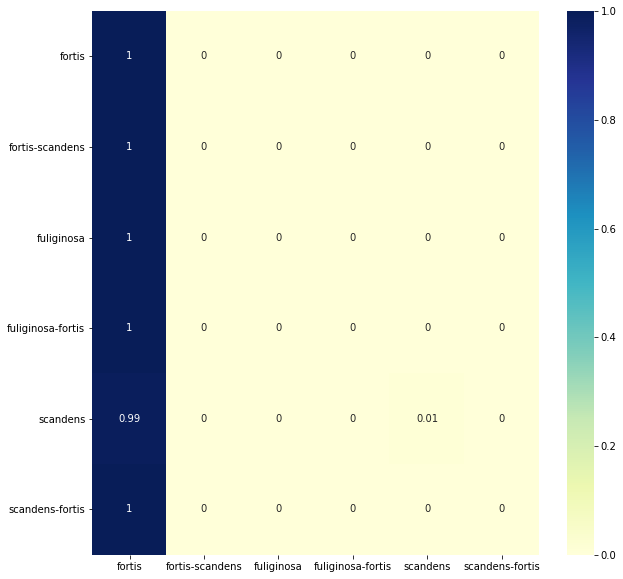

In [60]:
# Visulization of confusion matrix
class_names = list(np.unique(y_train))
def plot_cm(cm, class_names):
    """Normalize confusion matrix and make a heatmap"""
    norm_cm = pd.DataFrame(cm/cm.sum(axis=1, keepdims=True), index = class_names, columns = class_names)
    norm_cm = norm_cm.round(2)
    fig = plt.figure(figsize=(10,10))
    ax = sns.heatmap(norm_cm, annot=True, fmt="g",cmap="YlGnBu")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.show()

plot_cm(lr_cm, class_names)

The Logistic classifier fails the classification: it labels all the examples as fortis. It should at least be able to separate fortis and scandens pure breeds.

### Random Forest

In [18]:
# Train
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_input, y_train)

# Prediction
rf_predict = rf.predict(X_test_input)
rf_accuracy = accuracy_score(y_test, rf_predict)
print("Random Forest: ", rf_accuracy)

Random Forest:  0.7987321711568938


In [19]:
# Model tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_leaf":[1, 3],
    "min_samples_split": [2, 3],
    "n_estimators": [700, 1000, 3000]
}

rf = RandomForestClassifier(random_state=42)
rf_GS = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 3)
rf_GS.fit(X_train_input, y_train)
rf_GS.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 700}

In [20]:
# Predict again on the best model
rf_best = rf_GS.best_estimator_
rf_best_predict = rf_best.predict(X_test_input)
rf_best_accuracy = accuracy_score(y_test, rf_best_predict)
print("Random Forest best estimator: ", rf_best_accuracy)

Random Forest best estimator:  0.8193343898573693


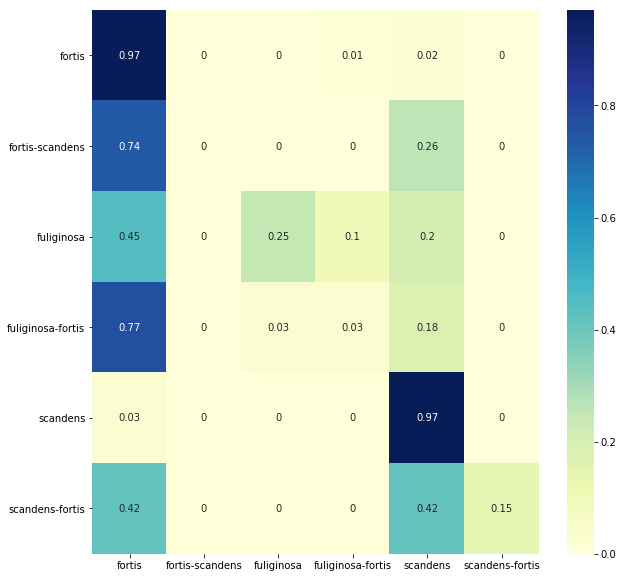

In [61]:
# confusion matrix
rf_best_cm = confusion_matrix(y_test, rf_best_predict)
plot_cm(rf_best_cm, class_names)

Although the accuracy is certainly incereased, this is still a very poor classification because it can only well characterize fortis and scandens, which account for most examples. The majority of the other classes, including pure fuliginosa, is incorrectly placed.

In [118]:
# Inverstigate feature importance
rf_feature_impor = pd.DataFrame({"Importance":list(rf_best.feature_importances_), 
                                 "Features": list(X_train.drop("sex", axis=1)) + ["female", "male", "unknown"]})

rf_feature_impor.sort_values(["Importance"])

,Importance,Features
6,0.005927,female
7,0.007290,male
8,0.008728,unknown
2,0.065125,tarsus
0,0.116028,weight
5,0.128167,bill width
4,0.129908,bill depth
1,0.149421,wing
3,0.389406,bill length


### Support Vector Machine

In [22]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train_input, y_train)

svc_predict = svc.predict(X_test_input)
svc_accuracy = accuracy_score(y_test, svc_predict)
print("SVC:", svc_accuracy)

SVC: 0.5673534072900158


In [23]:
# Tune hyperparameters
param_grid = {
    "gamma": [10, 100, 300],
    "C": [1, 10, 50]
}

svc = SVC(random_state=42)
svc_GS = GridSearchCV(svc, param_grid=param_grid, cv = 3)
svc_GS.fit(X_train_input, y_train)
svc_GS.best_params_

{'C': 10, 'gamma': 100}

In [24]:
svc_best = svc_GS.best_estimator_
svc_best_predict = svc_best.predict(X_test_input)
svc_best_accuracy = accuracy_score(y_test, svc_best_predict)
print("SVC best: ", svc_best_accuracy)

SVC best:  0.8114104595879557


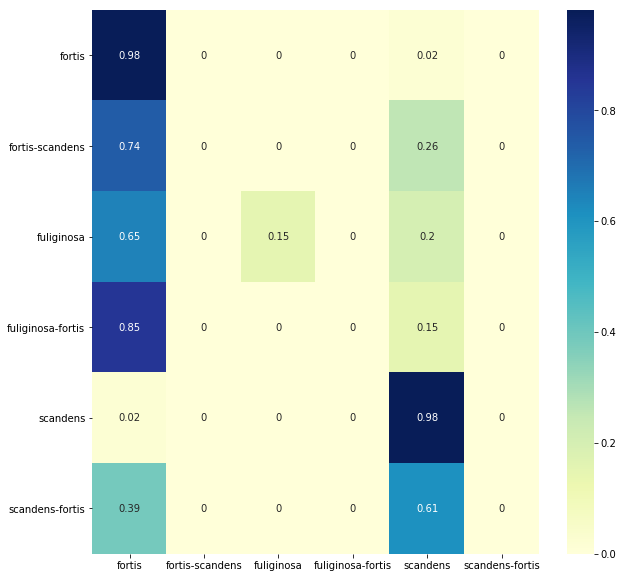

In [62]:
# confusion matrix
svc_best_cm = confusion_matrix(y_test, svc_best_predict)
plot_cm(svc_best_cm, class_names)

No improvement observed in SVC model.

### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_input, y_train)

gnb_predict = gnb.predict(X_test_input)
gnb_accuracy = accuracy_score(y_test, gnb_predict)
print("Naive Bayes:", gnb_accuracy)

Naive Bayes: 0.7749603803486529


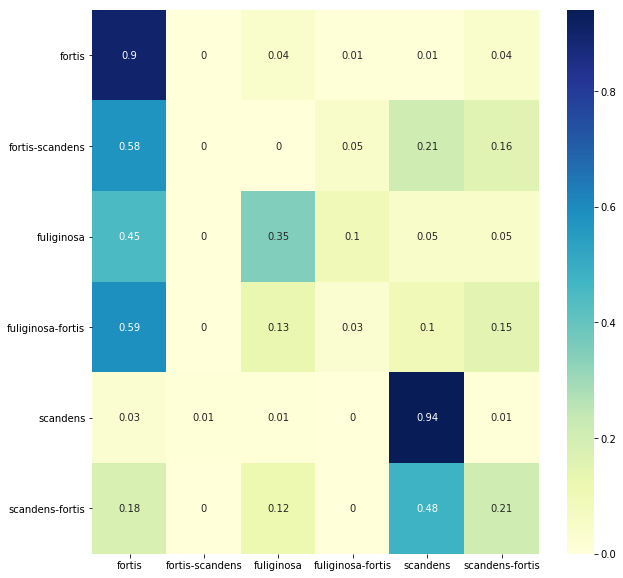

In [63]:
# confusion matrix
gnb_cm = confusion_matrix(y_test, gnb_predict)
plot_cm(gnb_cm, class_names)

Because Naive Bayes is only dependent on priors which means there is no need to tune or there is no hyperparameters to tune. This model still does not improve so much, but it shows a better classification of fuliginosa than the other models.

### K-nearest neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_input, y_train)

knn_predict = knn.predict(X_test_input)
knn_accuracy = accuracy_score(y_test, knn_predict)
print("KNN: ", knn_accuracy)

KNN:  0.7939778129952456


In [82]:
# Tune hyperparameters
param_grid = {
    "n_neighbors": [5, 10, 20, 30],
}

knn = KNeighborsClassifier()
knn_GS = GridSearchCV(knn, param_grid=param_grid, cv = 3)
knn_GS.fit(X_train_input, y_train)
knn_GS.best_params_

{'n_neighbors': 10}

In [83]:
knn_best = knn_GS.best_estimator_
knn_best_predict = knn_GS.predict(X_test_input)
knn_best_accuracy = accuracy_score(y_test, knn_best_predict)
print("KNN best: ", knn_best_accuracy)

KNN best:  0.8066561014263075


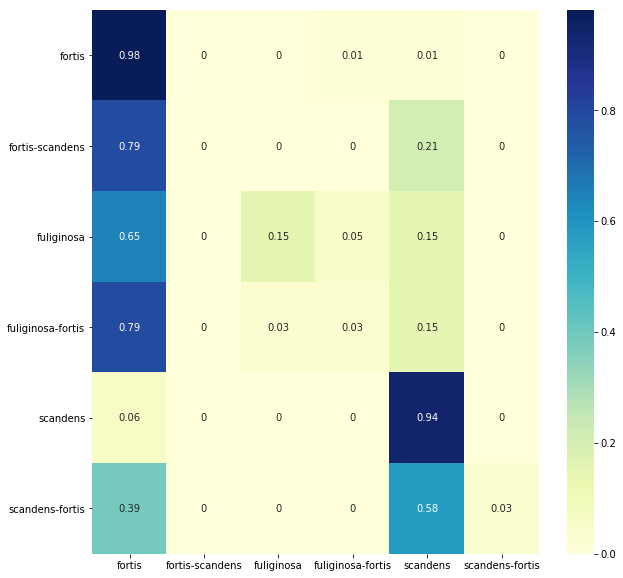

In [84]:
# confusion matrix
knn_best_cm = confusion_matrix(y_test, knn_best_predict)
plot_cm(knn_best_cm, class_names)

### MLP Neural Network

In [68]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_input, y_train)

mlp_predict = mlp.predict(X_test_input)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
print("MLP NN: ", mlp_accuracy)

MLP NN:  0.7702060221870047


In [73]:
# Tune hyperparameters
param_grid = {
    "solver": ["lbfgs"],
    "max_iter": [400, 600, 1000],
    "batch_size": [600, 1000],
    "activation": ["identity", "logistic", "tanh", "relu"]
}

mlp = MLPClassifier(random_state=42)
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv = 3)
mlp_GS.fit(X_train_input, y_train)
mlp_GS.best_params_

{'activation': 'identity',
 'batch_size': 600,
 'max_iter': 1000,
 'solver': 'lbfgs'}

In [75]:
mlp_best = mlp_GS.best_estimator_
mlp_best_predict = mlp_GS.predict(X_test_input)
mlp_best_accuracy = accuracy_score(y_test, mlp_best_predict)
print("MLP NN best: ", mlp_best_accuracy)

MLP NN best:  0.8193343898573693


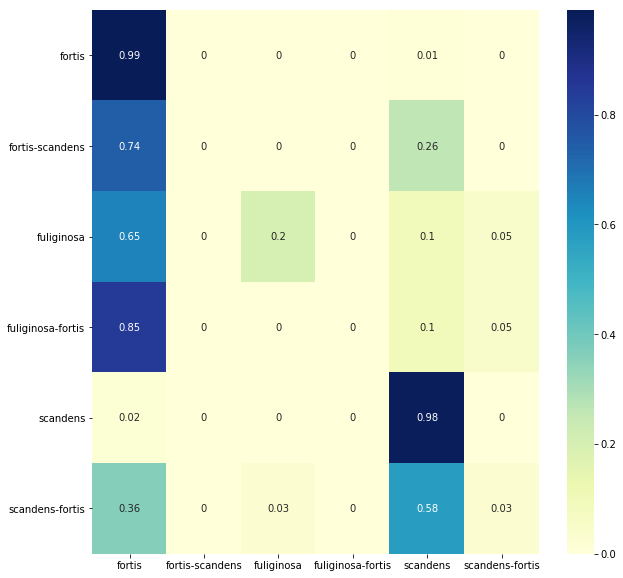

In [76]:
# Confusion matrix
mlp_best_cm = confusion_matrix(y_test, mlp_best_predict)
plot_cm(mlp_best_cm, class_names)

Even with neural network, the classification only has good performance for pure scandens and fortis.

## Model comparisons

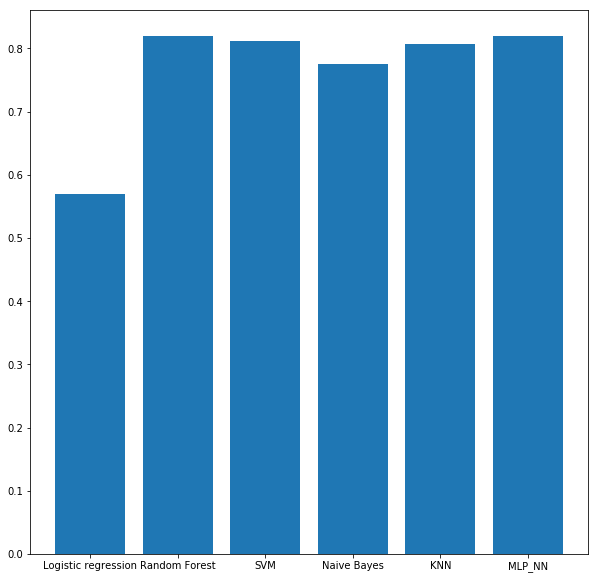

In [103]:
models = ["Logistic regression","Random Forest", "SVM", "Naive Bayes", "KNN", "MLP_NN"]
accuracies = [lr_accuracy, rf_best_accuracy, svc_best_accuracy, gnb_accuracy, knn_best_accuracy, mlp_best_accuracy]

fig = plt.figure(figsize=(10, 10))
plt.bar(models, accuracies)
plt.show()

## Conclusion
1. Except logistic regression, all the other models could reach accuracy above 80%. However, they are only able to make a fairly good classification on fortis and scandens. All the other populations, including fuliginosa pure breeds, cannot be well classfied.  
2. The three most importance features are bill length, wing and bill depth. Sex doesn't seem to play a key role in determining the class.  
3. All the three hybrid populations are poorly classified, and most of the hybrid examples are prone to be classified as fortis. This is because fortis as most examples and most variable phenotypes.
3. The reason that fuliginosa cannot be well identified is because its morphlogical measures are highly overlapped with fortis.
4. To sum up, morphological measurements alone cannot distinguish hybrids from pure breeds. The mixed training examples reduce the power of this method to split the pure breed fuliginosa.